# Clean this up!

In [326]:
import numpy as np
import random
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('seaborn-darkgrid')
sns.set_palette('colorblind')

In [327]:
def y(x, m, b): 
    return m*x + b

In [328]:
T_min = 0
T_max = 7
C_min = 4
C_max = 12

In [329]:
# np.random.seed(42)
X_t = np.linspace(T_min, T_max, 20)
X_c = np.linspace(C_min, C_max, 20)
b_t = 1
b_c = 0
y_t_true = [y(x, 10, b_t) for x in X_t]
y_c_true = [y(x, 10, b_c) for x in X_c]
y_t_jig = [y + np.random.normal(0,20) for y in y_t_true]
y_c_jig = [y + np.random.normal(0,20) for y in y_c_true]
df = {'X':np.concatenate((X_t, X_c)), 'X^2':np.concatenate((X_t**2, X_c**2)), 'y':np.concatenate((y_t_jig, y_c_jig)), 'T':[1]*len(y_t_true)+[0]*len(y_c_true)}
df = pd.DataFrame.from_dict(df, orient='columns')
df.head()

,X,X^2,y,T
0,0.000000,0.000000,2.670818,1
1,0.368421,0.135734,0.634814,1
2,0.736842,0.542936,21.530595,1
3,1.105263,1.221607,30.186678,1
4,1.473684,2.171745,-0.982947,1


### Simple

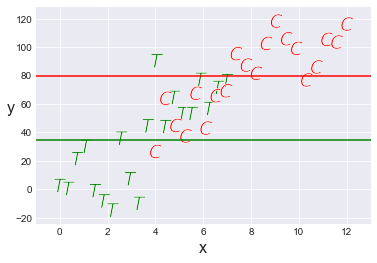

In [369]:
ax = sns.scatterplot(x='X', y='y', hue='T', style='T', data=df, markers=['$C$', '$T$'], s=200, palette=['r', 'g'])
plt.axhline(y=np.mean(y_t_jig), c='g')
plt.axhline(y=np.mean(y_c_jig), c='r')
ax.get_legend().remove()
plt.ylabel('y', rotation=0, size=16)
plt.xlabel('x', rotation=0, size=16)
set_lims()

### Linear

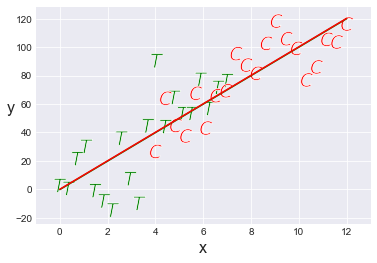

In [370]:
X = df.loc[:,['T','X']].to_numpy()
beta = np.linalg.inv(X.T.dot(X)).dot(X.T).dot(df['y'])

X = np.linspace(T_min,C_max,40)
y_T = [beta[0]+x*beta[1] for x in X]
y_C = [x*beta[1] for x in X]

plot(df)
set_lims()

### Polynomial

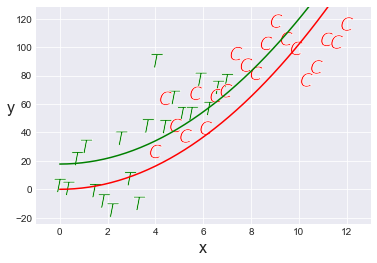

In [371]:
X = df.loc[:,['T','X^2']].to_numpy()
beta = np.linalg.inv(X.T.dot(X)).dot(X.T).dot(df['y'])

X = np.linspace(T_min,C_max,40)
y_T = [beta[0]+x**2*beta[1] for x in X]
y_C = [x**2*beta[1] for x in X]

plot(df)
set_lims()

# Preprocessing

### Simple

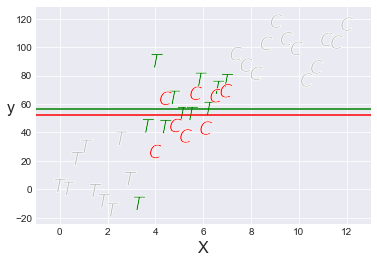

In [466]:
ax = sns.scatterplot(x='X', y='y', hue='T', style='T', data=df_inside, markers=['$C$', '$T$'], s=200, palette=['r', 'g'])

plt.axhline(y=df_inside.loc[df_inside['T']==1, 'y'].mean(), c='g')
plt.axhline(y=df_inside.loc[df_inside['T']==0, 'y'].mean(), c='r')
plt.ylabel('y', rotation=0, size=16)
plt.xlabel('x', rotation=0, size=16)

ax = sns.scatterplot(x='X', y='y', hue='T', style='T', data=df_outside, markers=['$C$', '$T$'], s=200, palette=['silver', 'silver'], ax=ax)
ax.get_legend().remove()
set_lims()

### Linear

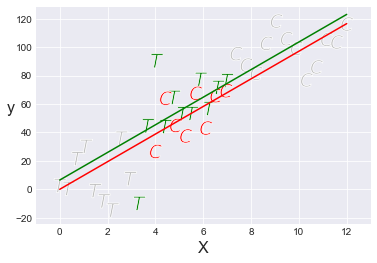

In [468]:
X = df_inside.loc[:,['T','X']].to_numpy()
beta = np.linalg.inv(X.T.dot(X)).dot(X.T).dot(df_inside['y'])

X = np.linspace(T_min,C_max,40)
y_T = [beta[0]+x*beta[1] for x in X]
y_C = [x*beta[1] for x in X]

ax = plot(df_inside)
ax = sns.scatterplot(x='X', y='y', hue='T', style='T', data=df_outside, markers=['$C$', '$T$'], s=200, palette=['silver', 'silver'], ax=ax)
ax.get_legend().remove()
set_lims()

### Polynomial

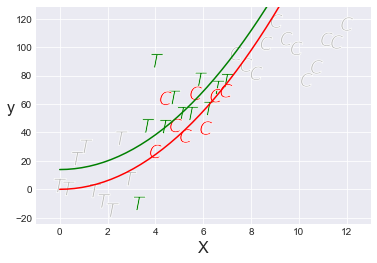

In [469]:
X = df_inside.loc[:,['T','X^2']].to_numpy()
beta = np.linalg.inv(X.T.dot(X)).dot(X.T).dot(df_inside['y'])

X = np.linspace(T_min,C_max,40)
y_T = [beta[0]+x**2*beta[1] for x in X]
y_C = [x**2*beta[1] for x in X]

ax = plot(df_inside)
sns.scatterplot(x='X', y='y', hue='T', style='T', data=df_outside, markers=['$C$', '$T$'], s=200, palette=['silver', 'silver'], ax=ax)
ax.get_legend().remove()
set_lims()

In [546]:
def plot(data):
    # kwargs = {'size':'weights', 'sizes':sizes} if 'weights' in data.columns else {}
    kwargs = {}
    ax = sns.scatterplot(x='X', y='y', hue='T', style='T', data=data, markers=['$C$', '$T$'], s=200, palette=['r', 'g'], **kwargs)
    plt.plot(X, y_T, c='g')
    plt.plot(X, y_C, c='r')
    ax.get_legend().remove()
    plt.ylabel('y', rotation=0, size=16)
    plt.xlabel('x', rotation=0, size=16)
    return ax

def set_lims(data, x, y, x_off=1, y_off=10):
    plt.axis([data[x].min()-x_off,data[x].max()+x_off, data[y].min()-y_off, data[y].max()+y_off])

# CEM

In [636]:
n = 50
P = np.random.normal(10,1,n)
Q = np.random.normal(15,2,n)
T = [int(np.random.uniform()>0.7) for _ in P]
y = P+2*Q
df_cem = pd.DataFrame.from_dict({'P':P, 'Q':Q, 'T':T, 'y':y}, orient='columns')
df_cem.head()

,P,Q,T,y
0,9.373775,16.294665,0,41.963106
1,10.144949,11.744228,0,33.633405
2,11.207994,12.328487,1,35.864967
3,7.754330,19.271252,0,46.296834
4,11.581272,13.979759,0,39.540789


In [637]:
sys.path.append('..')
from matching.cem import CEM
from math import floor, ceil

coarsening = {
    'P':{'bins':range(floor(df_cem['P'].min()-1), ceil(df_cem['P'].max()+5), 2), 'cut':'cut'},
    'Q':{'bins':range(floor(df_cem['Q'].min()-1), ceil(df_cem['Q'].max()+5), 3), 'cut':'cut'}
}

weights = CEM(df_cem, 'T', 'y', ['P', 'Q'], H=4).match(coarsening)
df_cem['weights'] = weights
sizes = (100,500)
df_inside = df_cem.loc[df_cem['weights']>0]
df_outside = df_cem.loc[df_cem['weights']==0]

### Simple

In [638]:
sizes=(10,600)

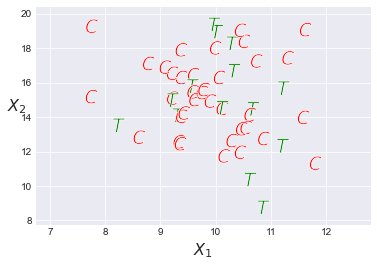

In [639]:
ax = sns.scatterplot(x='P', y='Q', hue='T', style='T', data=df_cem, markers=['$C$', '$T$'], s=200, palette=['r', 'g'])
ax.get_legend().remove()
plt.ylabel('$X_2$', rotation=0, size=16)
plt.xlabel('$X_1$', rotation=0, size=16)
set_lims(df_cem, 'P', 'Q', 1, 1)

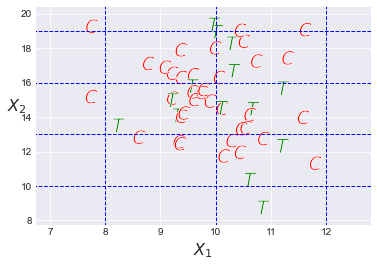

In [640]:
ax = sns.scatterplot(x='P', y='Q', hue='T', style='T', data=df_cem, markers=['$C$', '$T$'], s=200, palette=['r', 'g'])
ax.get_legend().remove()
ax.vlines(x=coarsening['P']['bins'], ymin=min(Q)-2, ymax=max(Q)+3, colors='b', linestyles='--', linewidths=1)
ax.hlines(y=coarsening['Q']['bins'], xmin=min(P)-2, xmax=max(P)+3, colors='b', linestyles='--', linewidths=1)
plt.ylabel('$X_2$', rotation=0, size=16)
plt.xlabel('$X_1$', rotation=0, size=16)
set_lims(df_cem, 'P', 'Q', 1, 1)

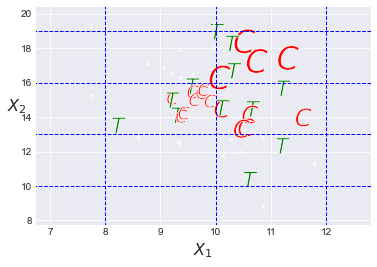

In [641]:
ax = sns.scatterplot(x='P', y='Q', hue='T', style='T', size='weights', sizes=sizes, data=df_inside, markers=['$C$', '$T$'], palette=['r', 'g'])
ax = sns.scatterplot(x='P', y='Q', hue='T', style='T', size='weights', sizes=sizes, data=df_outside, markers=['$C$', '$T$'], palette=['dimgrey','dimgrey'], ax=ax)
ax.get_legend().remove()
ax.vlines(x=coarsening['P']['bins'], ymin=min(Q)-2, ymax=max(Q)+3, colors='b', linestyles='--', linewidths=1)
ax.hlines(y=coarsening['Q']['bins'], xmin=min(P)-2, xmax=max(P)+3, colors='b', linestyles='--', linewidths=1)

plt.ylabel('$X_2$', rotation=0, size=16)
plt.xlabel('$X_1$', rotation=0, size=16)
set_lims(df_cem, 'P', 'Q', 1, 1)